# Investment Strategies Analysis
### Analysis of the investment strategies' outcome with the obtained data

## Loading libraries and data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
df = pd.read_csv('./outputs/data_generation/portfolio_metrics.csv')
df.head(10)

# Assets: stocks, corporate bonds, public bonds, gold, cash

,ST,CB,PB,GO,CA,RETURN,VOLAT
0,0,0,0,0,100,-6.691566,3.270975
1,0,0,0,20,80,-0.572426,1.592577
2,0,0,0,40,60,5.546714,2.328327
3,0,0,0,60,40,11.665854,4.173274
4,0,0,0,80,20,17.784994,6.076110
5,0,0,0,100,0,23.904133,7.911984
6,0,0,20,0,80,-5.309033,2.834127
7,0,0,20,20,60,0.810107,1.434222
8,0,0,20,40,40,6.929247,2.591559
9,0,0,20,60,20,13.048387,4.488546


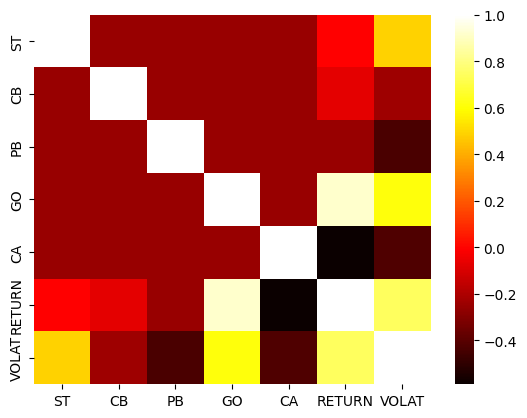

In [26]:
# ccorrelation matrix
corr = df.corr()

# heatmap


# change colours of heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='hot')
plt.show()

# types of cmap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Now let's look at the assets individually in the portfolio

In [27]:
# portfolios with 1 asset individually
df100 = df[df.isin([100]).any(axis=1)]
df100.head()

,ST,CB,PB,GO,CA,RETURN,VOLAT
0,0,0,0,0,100,-6.691566,3.270975
5,0,0,0,100,0,23.904133,7.911984
20,0,0,100,0,0,0.221099,1.577834
55,0,100,0,0,0,3.918536,2.232727
125,100,0,0,0,0,5.133871,7.909930


## 1.1. Distribution of obtained returns 

In [28]:
print('Return Statistics:')
print('------------------')
print(df['RETURN'].describe())

Return Statistics:
------------------
count    126.000000
mean       5.297215
std        5.897931
min       -6.691566
25%        1.227764
50%        4.238132
75%        8.584090
max       23.904133
Name: RETURN, dtype: float64


In [29]:
# portfolios with 1 asset individually
df100 = df[df.isin([100]).any(axis=1)]
df100.head()

,ST,CB,PB,GO,CA,RETURN,VOLAT
0,0,0,0,0,100,-6.691566,3.270975
5,0,0,0,100,0,23.904133,7.911984
20,0,0,100,0,0,0.221099,1.577834
55,0,100,0,0,0,3.918536,2.232727
125,100,0,0,0,0,5.133871,7.909930


In [30]:
# return the rows with the highest return
df.nlargest(10, 'RETURN')

,ST,CB,PB,GO,CA,RETURN,VOLAT
5,0,0,0,100,0,23.904133,7.911984
60,20,0,0,80,0,20.150081,7.073028
25,0,20,0,80,0,19.907014,6.751897
10,0,0,20,80,0,19.167527,6.388061
4,0,0,0,80,20,17.784994,6.076110
94,40,0,0,60,0,16.396029,6.501591
74,20,20,0,60,0,16.152961,5.891941
39,0,40,0,60,0,15.909894,5.562514
64,20,0,20,60,0,15.413474,5.473178
29,0,20,20,60,0,15.170407,5.177496


In [31]:

# return the rows with the lowest return
df.nsmallest(10, 'RETURN')

,ST,CB,PB,GO,CA,RETURN,VOLAT
0,0,0,0,0,100,-6.691566,3.270975
6,0,0,20,0,80,-5.309033,2.834127
21,0,20,0,0,80,-4.569545,2.414848
56,20,0,0,0,80,-4.326478,2.116356
11,0,0,40,0,60,-3.926500,2.429091
26,0,20,20,0,60,-3.187012,2.021358
61,20,0,20,0,60,-2.943945,1.730350
15,0,0,60,0,40,-2.543967,2.068987
36,0,40,0,0,60,-2.447525,1.712806
71,20,20,0,0,60,-2.204458,1.552372


In [32]:
# probability of a negative return
print()
print('Probability of a negative return:')
print('---------------------------------')
print(df[df['RETURN'] < 0].shape[0] / df.shape[0])

# probability of a positive return
print()
print('Probability of a positive return:')
print('---------------------------------')
print(df[df['RETURN'] > 0].shape[0] / df.shape[0])


Probability of a negative return:
---------------------------------
0.1746031746031746

Probability of a positive return:
---------------------------------
0.8253968253968254


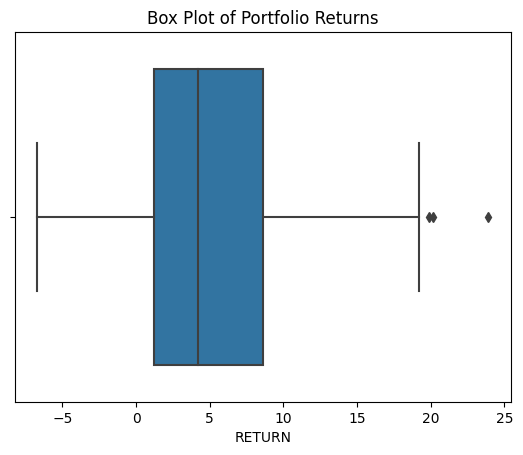

In [33]:
# Plot a box plot of the returns using Seaborn
sns.boxplot(data=df, x='RETURN')
plt.title('Box Plot of Portfolio Returns')
plt.show()

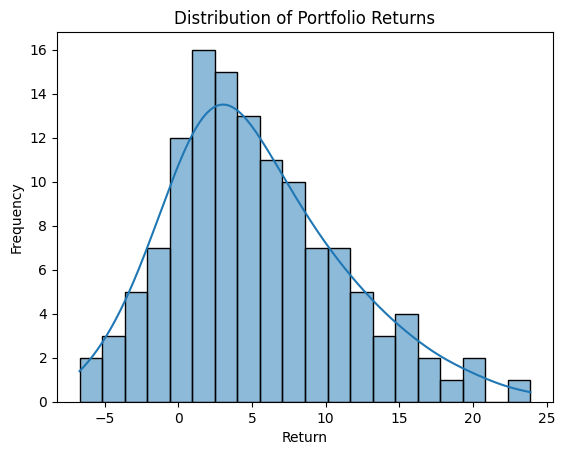

In [34]:
# Plot a histogram of the returns
sns.histplot(data=df, x='RETURN', bins=20, kde=True)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Returns')
plt.show()



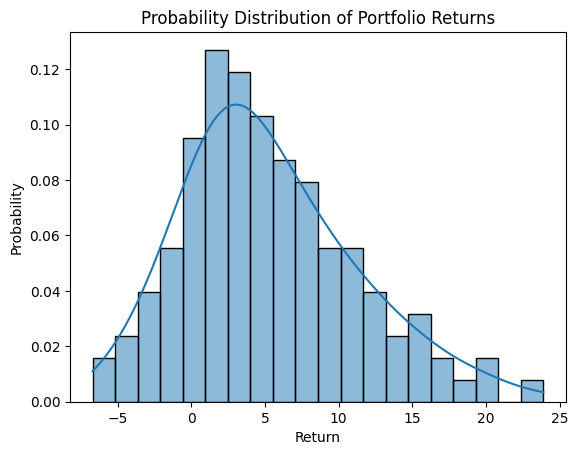

In [35]:
# probability distribution of the returns
sns.histplot(data=df, x='RETURN', bins=20, kde=True, stat='probability')
plt.xlabel('Return')
plt.ylabel('Probability')
plt.title('Probability Distribution of Portfolio Returns')
plt.show()

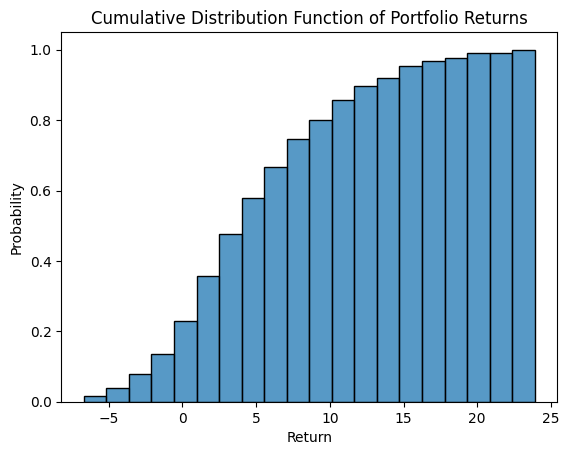

In [36]:
# Plot a cumulative distribution function of the returns using Seaborn
sns.histplot(data=df, x='RETURN', bins=20, cumulative=True, stat='density')
plt.xlabel('Return')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Function of Portfolio Returns')
plt.show()

## 1.2. Distribution of obtained volatilities 

In [37]:
print('Volatility Statistics')
print('----------------------')
print(df['VOLAT'].describe())

Volatility Statistics
----------------------
count    126.000000
mean       3.204068
std        1.675337
min        1.223643
25%        1.755915
50%        2.757381
75%        4.334817
max        7.911984
Name: VOLAT, dtype: float64


In [38]:
# portfolios with 1 asset individually
df100 = df[df.isin([100]).any(axis=1)]
df100.head()

,ST,CB,PB,GO,CA,RETURN,VOLAT
0,0,0,0,0,100,-6.691566,3.270975
5,0,0,0,100,0,23.904133,7.911984
20,0,0,100,0,0,0.221099,1.577834
55,0,100,0,0,0,3.918536,2.232727
125,100,0,0,0,0,5.133871,7.909930


In [39]:

# return the rows with the lowest volatility
df.nsmallest(10, 'VOLAT')

,ST,CB,PB,GO,CA,RETURN,VOLAT
70,20,0,80,0,0,1.203654,1.223643
68,20,0,60,0,20,-0.178879,1.235030
43,0,40,40,0,20,0.317541,1.274325
45,0,40,60,0,0,1.700074,1.282775
78,20,20,40,0,20,0.560608,1.285765
35,0,20,80,0,0,0.960586,1.324858
75,20,20,20,0,40,-0.821925,1.339905
49,0,60,20,0,20,1.057028,1.344461
57,20,0,0,20,60,1.792662,1.370598
46,0,60,0,0,40,-0.325505,1.376701


In [40]:
# return the rows with the highest volatility
df.nlargest(10, 'VOLAT')

,ST,CB,PB,GO,CA,RETURN,VOLAT
5,0,0,0,100,0,23.904133,7.911984
125,100,0,0,0,0,5.133871,7.909930
60,20,0,0,80,0,20.150081,7.073028
122,80,0,0,20,0,8.887924,6.833413
25,0,20,0,80,0,19.907014,6.751897
94,40,0,0,60,0,16.396029,6.501591
10,0,0,20,80,0,19.167527,6.388061
124,80,20,0,0,0,4.890804,6.376602
113,60,0,0,40,0,12.641976,6.373216
4,0,0,0,80,20,17.784994,6.076110


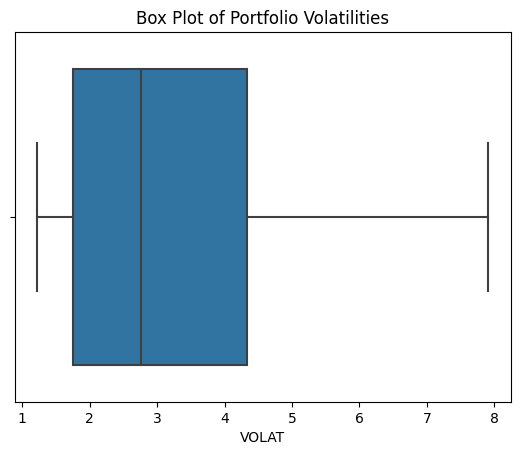

In [41]:
# Plot a box plot of the returns using Seaborn
sns.boxplot(data=df, x='VOLAT')
plt.title('Box Plot of Portfolio Volatilities')
plt.show()

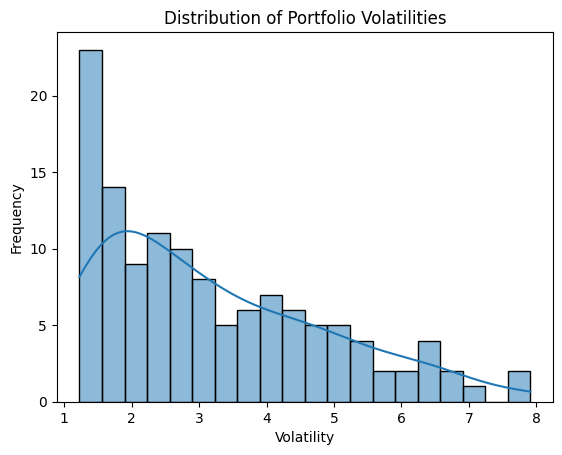

In [42]:
# Plot a histogram of the returns
sns.histplot(data=df, x='VOLAT', bins=20, kde=True)
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.title('Distribution of Portfolio Volatilities')
plt.show()

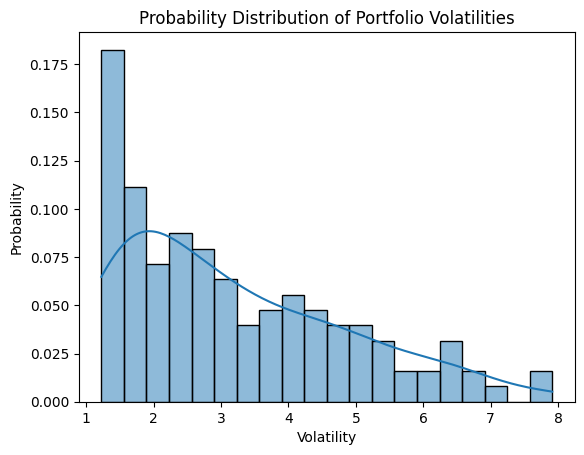

In [43]:
# probability distribution of the returns
sns.histplot(data=df, x='VOLAT', bins=20, kde=True, stat='probability')
plt.xlabel('Volatility')
plt.ylabel('Probability')
plt.title('Probability Distribution of Portfolio Volatilities')
plt.show()

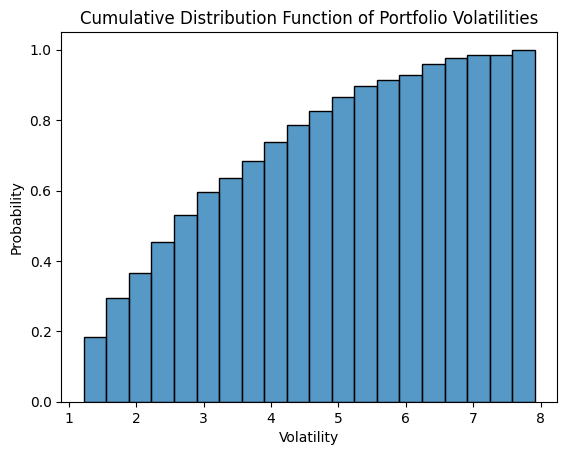

In [44]:
# Plot a cumulative distribution function of the returns using Seaborn
sns.histplot(data=df, x='VOLAT', bins=20, cumulative=True, stat='density')
plt.xlabel('Volatility')
plt.ylabel('Probability')
plt.title('Cumulative Distribution Function of Portfolio Volatilities')
plt.show()

## 2. Return VS Risk 

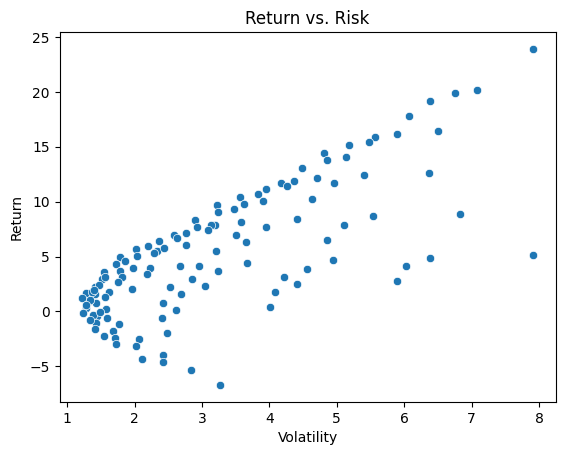

In [45]:
# Create a scatterplot of return vs. risk
sns.scatterplot(data=df, x='VOLAT', y='RETURN')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Return vs. Risk')
plt.show()